HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. How will you help this NGO to make a correct decision based on socioeconomic and health factors?


In [2]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading the dataset to python environment

data = pd.read_csv("Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
#to check for the dimension of the data

data.shape

(167, 10)

In [7]:
#to find the features of the data

data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [8]:
#basic info of the dataset

data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
# Checking the data types of different features

data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [10]:
#checking for null values in the data set

data.isnull().sum() 

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No null values present in the dataset

In [11]:
# exports, import and health are given as % of of gdp. lets convert them into exact nos.

data['imports']=round((data.imports*data.gdpp)/100)
data['health']=round((data.health*data.gdpp)/100)
data['exports']=round((data.exports*data.gdpp)/100)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200


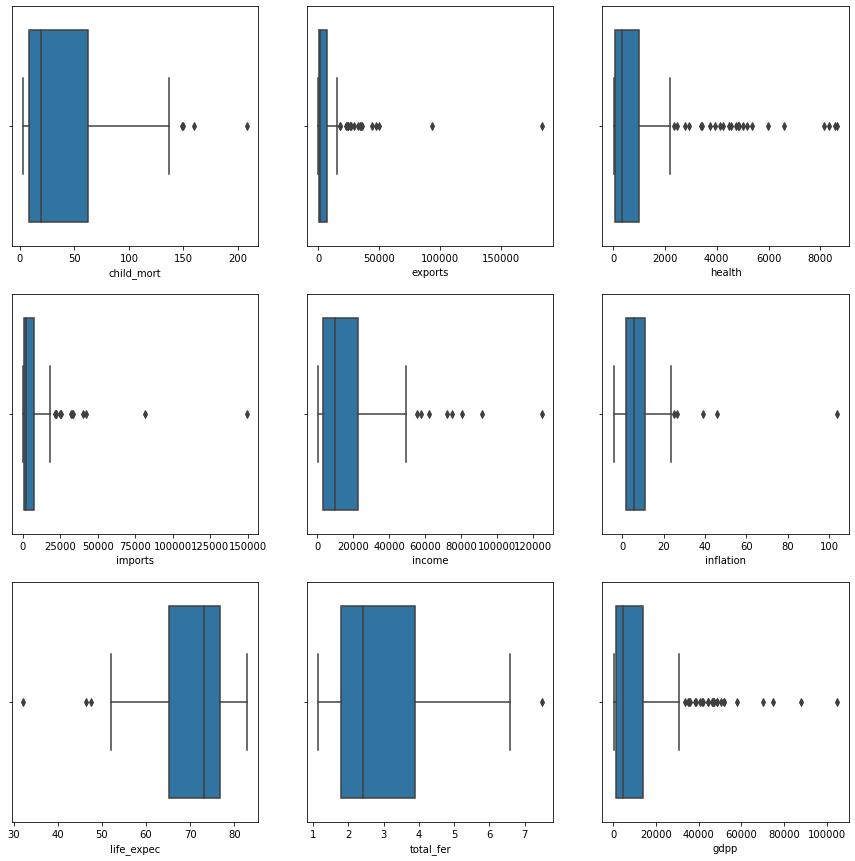

In [12]:
#Outlier Detection and Handling

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,15))
ax=ax.flatten()
int_cols= data.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(data[i], ax=ax[x])
plt.show()

Outliers for features like 'child_mort', 'inflation', 'life_expec', 'total_fer' are at critical socio-economic and health conditions

Outliers for exports, imports, health, income features are mostly developed countries with better socio-economic and health conditions than rest

In [13]:
data1=data.copy()
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200


Exports

In [15]:
Q1 = data1['exports'].quantile(0.25)
Q2 = data1['exports'].quantile(0.50)
Q3 = data1['exports'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data1['exports']=np.where(data1['exports']>upper_limit,upper_limit,np.where(data1['exports']<lower_limit,lower_limit,data1['exports']))

Imports

In [16]:
Q1 = data1['imports'].quantile(0.25)
Q2 = data1['imports'].quantile(0.50)
Q3 = data1['imports'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data1['imports']=np.where(data1['imports']>upper_limit,upper_limit,np.where(data1['imports']<lower_limit,lower_limit,data1['imports']))

Health

In [17]:
Q1 = data1['health'].quantile(0.25)
Q2 = data1['health'].quantile(0.50)
Q3 = data1['health'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data1['health']=np.where(data1['health']>upper_limit,upper_limit,np.where(data1['health']<lower_limit,lower_limit,data1['health']))

Income

In [18]:
Q1 = data1['income'].quantile(0.25)
Q2 = data1['income'].quantile(0.50)
Q3 = data1['income'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data1['income']=np.where(data1['income']>upper_limit,upper_limit,np.where(data1['income']<lower_limit,lower_limit,data1['income']))

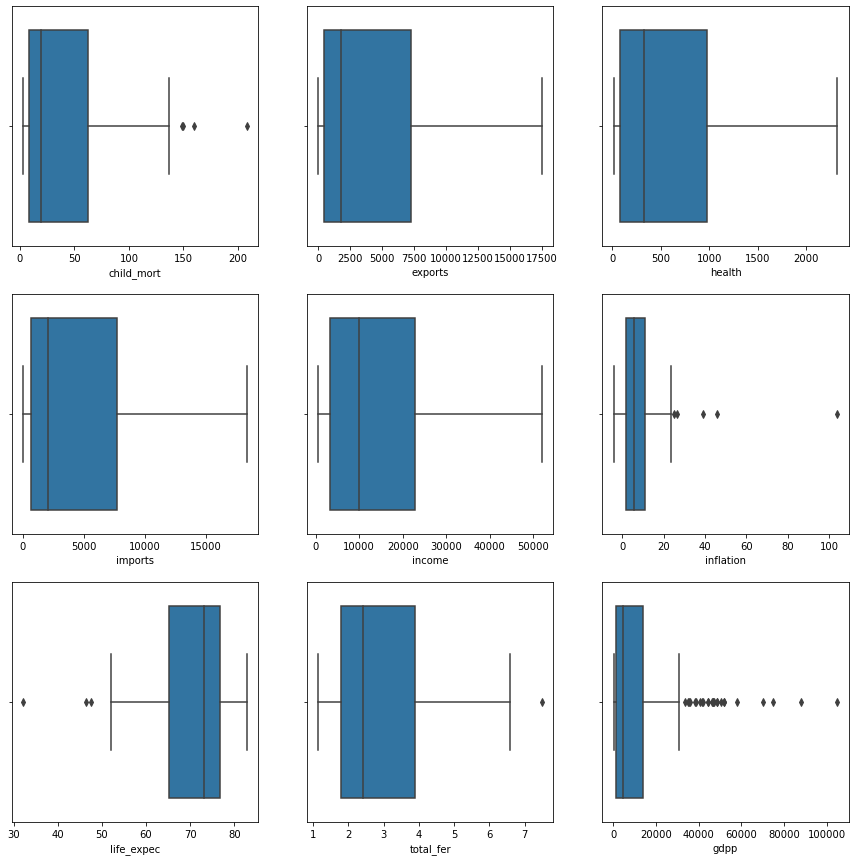

In [19]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,15))
ax=ax.flatten()
int_cols= data1.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(data1[i], ax=ax[x])
plt.show()

In [20]:
# Applying standard scaling

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data1.iloc[:,1:])

K-Means Clustering

In [22]:
from sklearn.cluster import KMeans
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,init="k-means++",random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)
print(inertia)

[1503.0, 740.6523357173688, 467.35189412132473, 388.40739282260796, 332.0072623778184, 287.7339254795492, 262.01311429882213, 234.58814649187713, 210.04442124853605, 193.65853796547424]


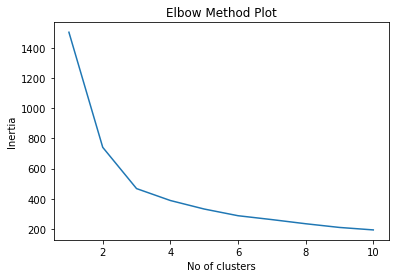

In [23]:
plt.plot(ks,inertia)
plt.title("Elbow Method Plot")
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(scaled_data)
km=model_kmeans.predict(scaled_data)
print(model_kmeans.labels_)

[2 0 0 2 0 0 0 1 1 0 1 1 0 0 0 1 0 2 0 0 0 0 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 2 0 2 0 1 1 1 0 0 0 0 2 2 0 0 1 1 2 2 0 1 2 1 0 0 2 2 0 2 0 1 0 0 0 0 1
 1 1 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0 1 0 2 2 0 0 2 1 2 0 0 0 0 0 0 2 0 2 0 1
 1 2 2 1 1 2 0 0 0 0 0 1 1 0 0 2 0 1 2 0 0 2 1 1 1 2 0 1 1 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 0 2 0 1 1 1 0 0 0 0 0 2 2]


In [25]:
data1['KMean_ClusterID']= pd.Series(km)
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_ClusterID
0,Afghanistan,90.2,55.0,42.0,248.0,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.0,268.0,1988.0,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1713.0,186.0,1400.0,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.0,101.0,1514.0,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100.0,1.44,76.8,2.13,12200,0


# Agglomerative Heirarchial Clustering

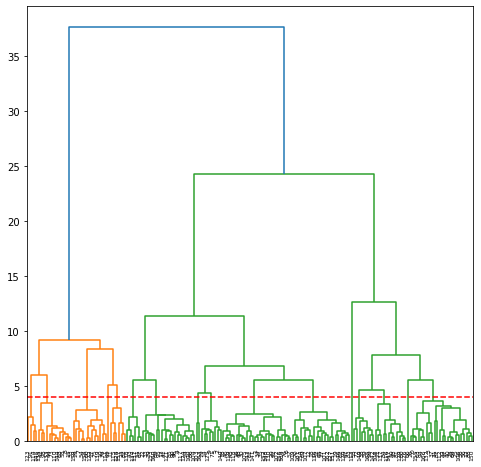

In [26]:
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize = (8,8))
dendro = linkage(scaled_data,method = 'ward')
dendrogram(dendro, leaf_rotation = 90, leaf_font_size = 6)
plt.hlines(4,0,27000,colors="red",linestyles="dashed")
plt.show()

In [27]:
model_kmeans = KMeans(n_clusters=3,max_iter=50,random_state = 50)
model_kmeans.fit(scaled_data)
labels_sc = model_kmeans.predict(scaled_data)
print(labels_sc)

[0 1 1 0 1 1 1 2 2 1 2 2 1 1 1 2 1 0 1 1 1 1 1 2 1 0 0 1 0 2 1 0 0 1 1 1 0
 0 0 1 0 1 2 2 2 1 1 1 1 0 0 1 1 2 2 0 0 1 2 0 2 1 1 0 0 1 0 1 2 1 1 1 1 2
 2 2 1 2 1 1 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 1 0 1 2
 2 0 0 2 2 0 1 1 1 1 1 2 2 1 1 0 1 2 0 1 1 0 2 2 2 0 1 2 2 1 1 0 1 2 2 1 0
 1 0 0 1 1 1 1 0 1 2 2 2 1 1 1 1 1 0 0]


In [28]:
data1['AHC_ClusterID']= pd.Series(labels_sc)
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_ClusterID,AHC_ClusterID
0,Afghanistan,90.2,55.0,42.0,248.0,1610.0,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.0,268.0,1988.0,9930.0,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1713.0,186.0,1400.0,12900.0,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.0,101.0,1514.0,5900.0,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100.0,1.44,76.8,2.13,12200,0,1


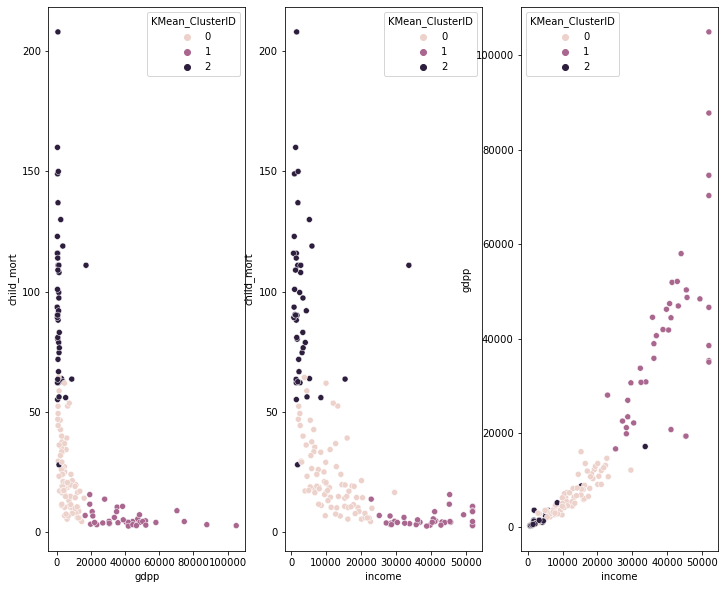

In [29]:
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data= data1, hue = 'KMean_ClusterID')
plt.subplot(1,3,2)
sns.scatterplot(x = 'income', y = 'child_mort', data= data1, hue = 'KMean_ClusterID')
plt.subplot(1,3,3)
sns.scatterplot(x = 'income', y = 'gdpp', data= data1, hue = 'KMean_ClusterID')
plt.show()

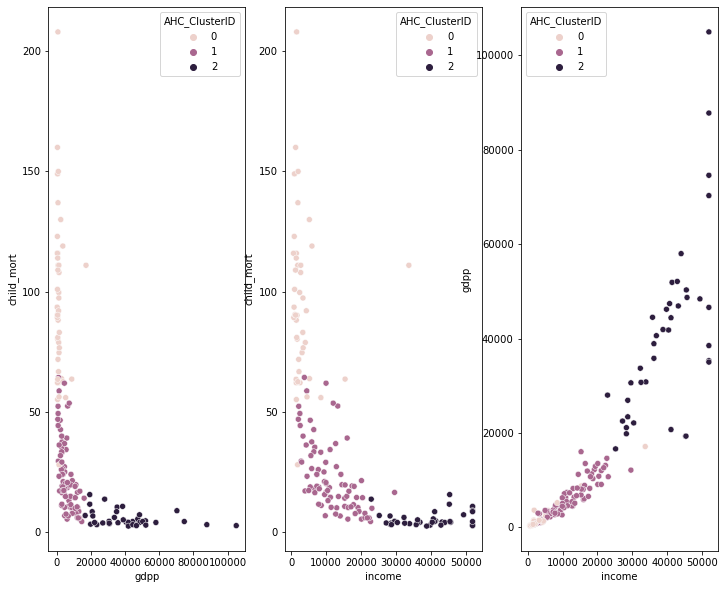

In [30]:
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data= data1, hue = 'AHC_ClusterID')
plt.subplot(1,3,2)
sns.scatterplot(x = 'income', y = 'child_mort', data= data1, hue = 'AHC_ClusterID')
plt.subplot(1,3,3)
sns.scatterplot(x = 'income', y = 'gdpp', data= data1, hue = 'AHC_ClusterID')
plt.show()

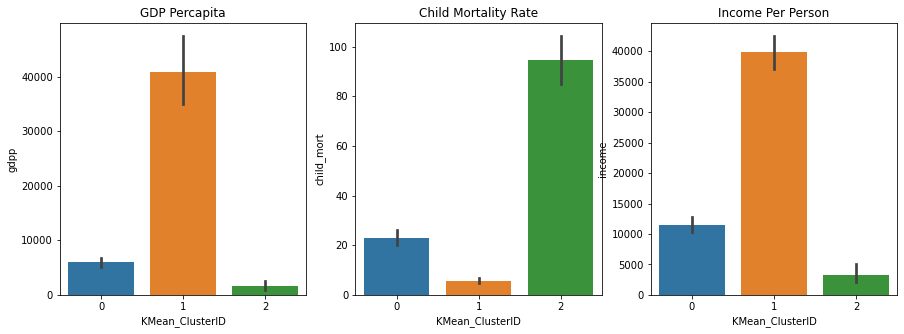

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x = 'KMean_ClusterID', y = 'gdpp', data= data1)
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'KMean_ClusterID', y = 'child_mort', data= data1)
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'KMean_ClusterID', y = 'income', data= data1)
plt.title('Income Per Person')
plt.show()

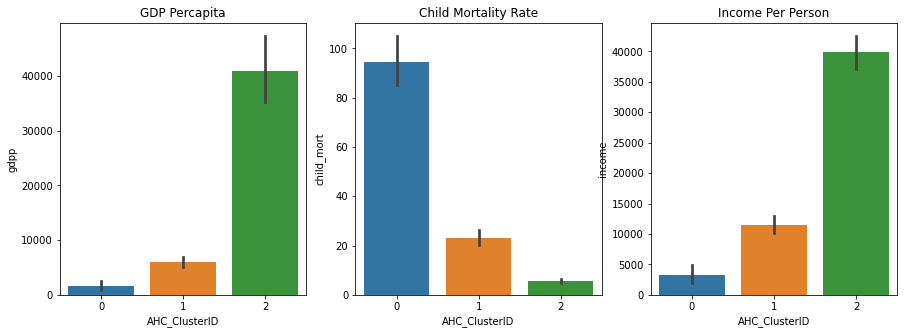

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x = 'AHC_ClusterID', y = 'gdpp', data= data1)
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'AHC_ClusterID', y = 'child_mort', data= data1)
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'AHC_ClusterID', y = 'income', data= data1)
plt.title('Income Per Person')
plt.show()

In [33]:
Underdeveloped_KMeancluster = data1[data1['KMean_ClusterID']== 1]
Underdeveloped_countries  = Underdeveloped_KMeancluster.sort_values(by = ['gdpp','income','child_mort'],ascending=[True, True, False])

Underdeveloped_countries['country'].values

array(['Slovak Republic', 'Oman', 'Saudi Arabia', 'Czech Republic',
       'Bahrain', 'Malta', 'South Korea', 'Portugal', 'Slovenia',
       'Greece', 'Bahamas', 'Israel', 'Spain', 'Cyprus', 'New Zealand',
       'United Arab Emirates', 'Brunei', 'Italy', 'Kuwait',
       'United Kingdom', 'France', 'Germany', 'Iceland', 'Belgium',
       'Japan', 'Finland', 'Singapore', 'Austria', 'Canada',
       'United States', 'Ireland', 'Netherlands', 'Australia', 'Sweden',
       'Denmark', 'Qatar', 'Switzerland', 'Norway', 'Luxembourg'],
      dtype=object)

In [34]:
Underdeveloped_AHCcluster = data1[data1['AHC_ClusterID']== 1]
Underdevelopedcountry  = Underdeveloped_AHCcluster.sort_values(by = ['gdpp','income','child_mort'],ascending=[True, True, False])

Underdevelopedcountry['country'].values

array(['Nepal', 'Tajikistan', 'Bangladesh', 'Cambodia', 'Kyrgyz Republic',
       'Myanmar', 'Vietnam', 'India', 'Uzbekistan', 'Moldova', 'Bolivia',
       'Philippines', 'Bhutan', 'Egypt', 'Mongolia', 'Sri Lanka',
       'Morocco', 'Guatemala', 'Micronesia, Fed. Sts.', 'Georgia',
       'Vanuatu', 'Ukraine', 'El Salvador', 'Guyana', 'Indonesia',
       'Armenia', 'Paraguay', 'Cape Verde', 'Samoa', 'Tonga', 'Fiji',
       'Jordan', 'Albania', 'Tunisia', 'Belize', 'Turkmenistan',
       'Algeria', 'Iraq', 'Macedonia, FYR', 'China',
       'Bosnia and Herzegovina', 'Ecuador', 'Jamaica', 'Peru', 'Thailand',
       'Serbia', 'Dominican Republic', 'Azerbaijan', 'Belarus',
       'St. Vincent and the Grenadines', 'Colombia', 'Botswana', 'Iran',
       'Montenegro', 'Bulgaria', 'Maldives', 'South Africa', 'Grenada',
       'Mauritius', 'Panama', 'Costa Rica', 'Romania', 'Suriname',
       'Lebanon', 'Kazakhstan', 'Malaysia', 'Argentina', 'Turkey',
       'Russia', 'Seychelles', 'Brazil', 'Lat

Agglomerative Hierarchical Clustering model is chosen as final model as per the above observations and the above mentioned are the countries that are in the need of aid.